## Atelier Adaboost


### Contexte: 
Nous souhaitons mettre en place un modèle approprié permettant d'identifier si le client de la banque est dépositaire ou non.
### Description du Dataset
Notre Dataset 'bank_full.csv' contient des informations sur tous les clients de la banque. 
La dataset contient 16 variables indépendantes ( age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, compaign, pdays, previous, poutcome) et une variable dépendante (cible).
Il existe de nombreuses colonnes qui ne sont pas numériques.

In [191]:
# Importer les libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
# get rid of annoying seaborn and scikit learn errors
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn


### Load Dataset

In [192]:
# Importer le dataset
df=pd.read_csv("bank_full.csv")

In [193]:
#Visualiser les 5 premiers
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [194]:
# Visualiser les derniers enregistrements
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Exploration des données

In [195]:
# demensions
df.shape

(45211, 17)

In [196]:
# Analyse descriptive du dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


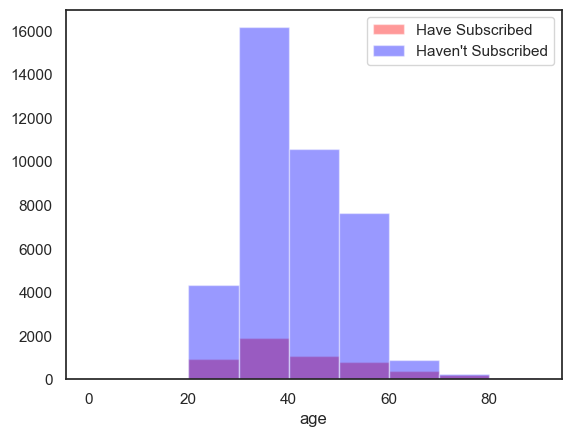

In [197]:
#histogram age
#Age group
bins = range(0, 100, 10)
ax = sns.distplot(df.age[df.Target=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(df.age[df.Target=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()

<AxesSubplot:xlabel='job', ylabel='count'>

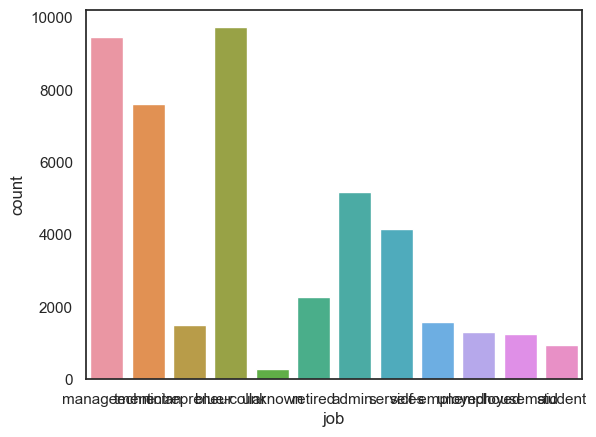

In [198]:
#countplot job
sns.countplot(x='job', data=df, label='Count')

<AxesSubplot:xlabel='marital', ylabel='count'>

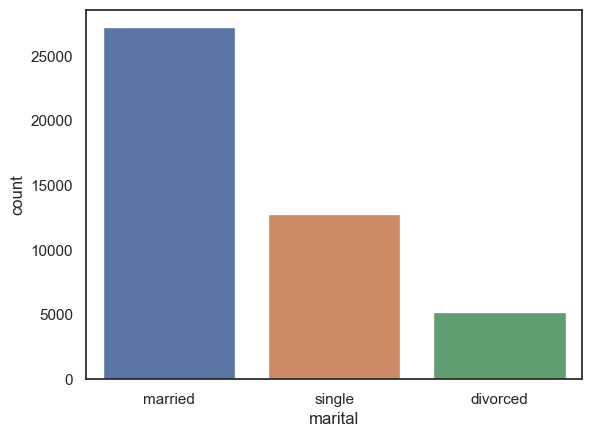

In [199]:
#countplot Marital status
sns.countplot(x='marital', data=df, label='count')

<AxesSubplot:xlabel='education', ylabel='count'>

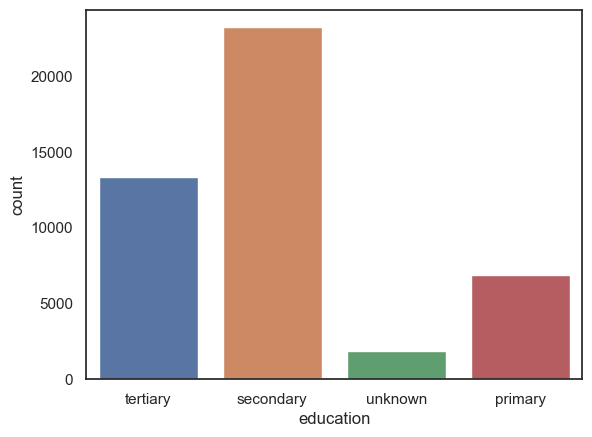

In [200]:
#countplot education level
sns.countplot(x='education', data=df, label='count')

<AxesSubplot:xlabel='housing', ylabel='count'>

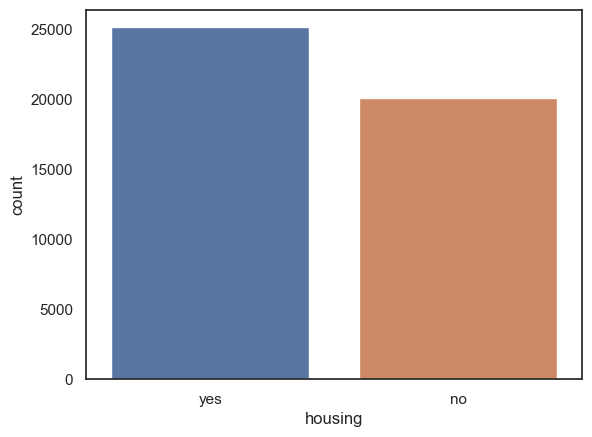

In [201]:
#countplot housing
sns.countplot(x='housing', data=df, label='count')

<AxesSubplot:xlabel='loan', ylabel='count'>

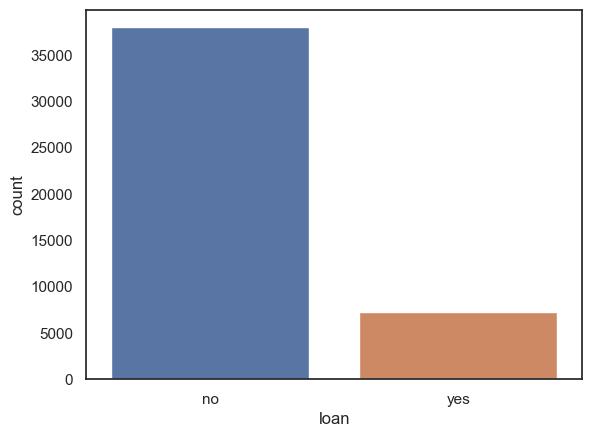

In [202]:
#countplot loan
sns.countplot(x='loan', data=df, label='count')


In [203]:
#Encoding of categorical variables
categorical_features = list(df.select_dtypes(exclude=['int64']))
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

In [204]:
df[categorical_features]

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3,1
45207,5,0,0,0,0,0,0,9,3,1
45208,5,1,1,0,0,0,0,9,2,1
45209,1,1,1,0,0,0,1,9,3,0


<AxesSubplot:>

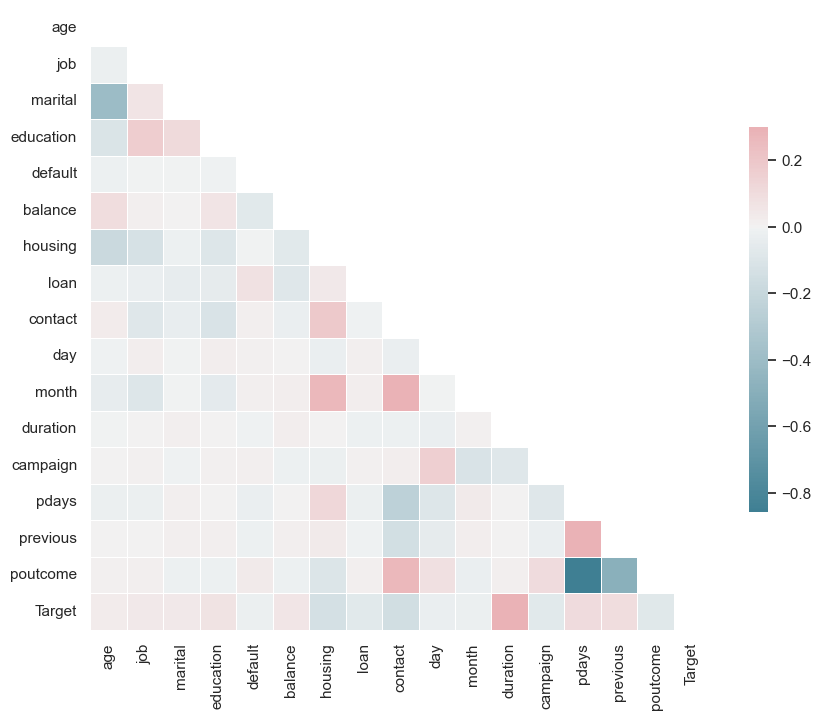

In [205]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

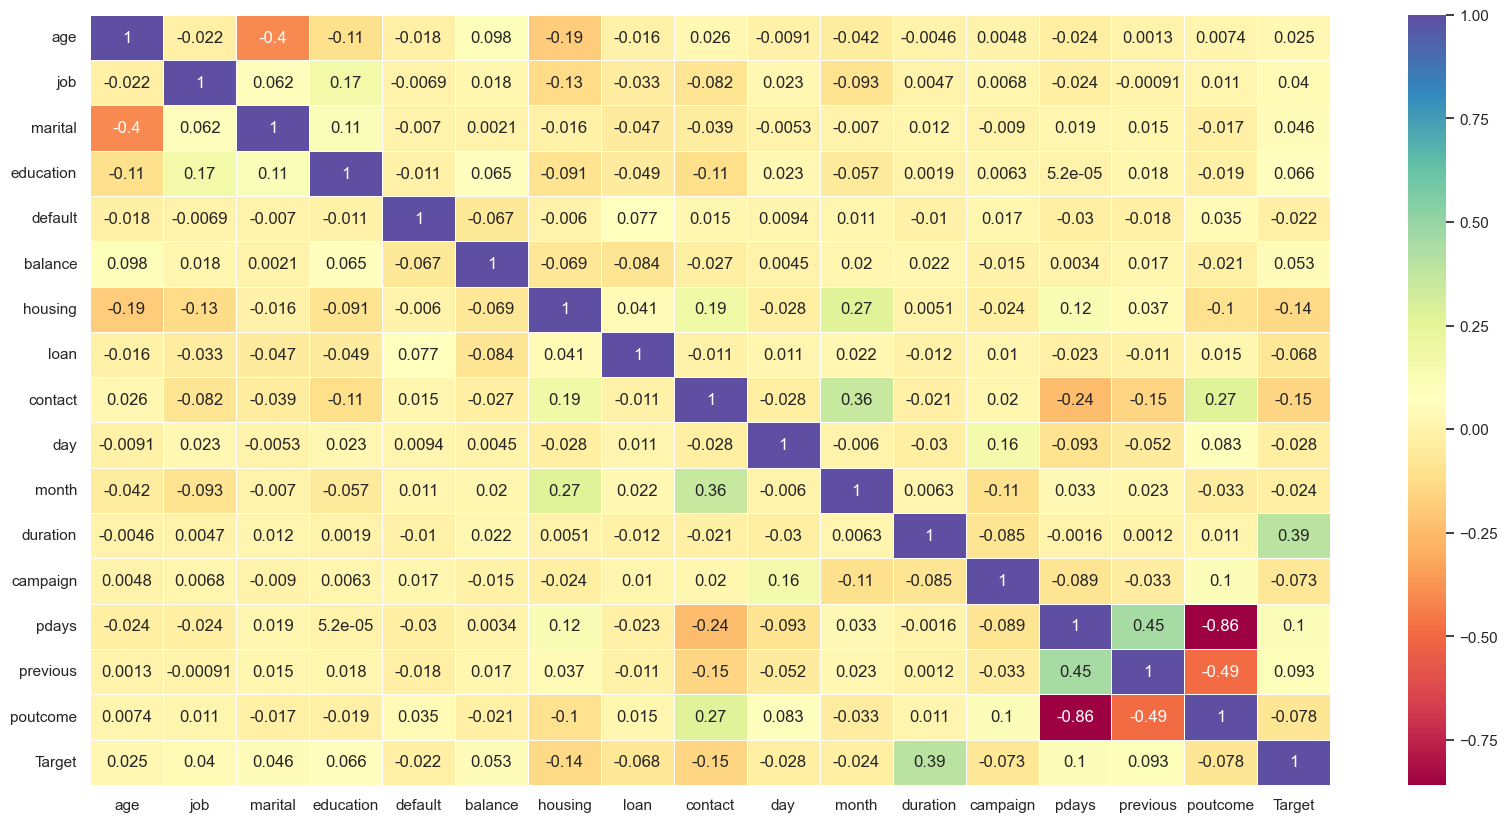

In [206]:
# correlation plot---heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,cmap="Spectral")


In [207]:
#split data X and Y
X = df.drop(['Target'],axis=1)
y = df['Target']

In [208]:
# Split X and y into training and test set in 70,30 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=3)

### Decision Tree Model

In [209]:
#Fit, predict   
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [210]:
#Evaluate the model using accuracy and confusion matrix
print('Le train score est :', dt.score(X_train, y_train))
print('Le test score est :', dt.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Le train score est : 1.0
Le test score est : 0.8729725744618106
[[11088   881]
 [  842   753]]


### Random Forest Classifier

In [211]:
#Fit, predict
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [212]:
#Evaluate the model using accuracy and confusion matrix
print('Le train score est :', dt.score(X_train, y_train))
print('Le test score est :', dt.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Le train score est : 0.9999684014282555
Le test score est : 0.9049690356826895
[[11609   360]
 [  929   666]]


### Ensemble Learning Adaboost

In [213]:
#Fit, predict
from sklearn.ensemble import AdaBoostClassifier
dt = AdaBoostClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [214]:
#Evaluate the model using accuracy and confusion matrix
print('Le train score est :', dt.score(X_train, y_train))
print('Le test score est :', dt.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

Le train score est : 0.8982841975542706
Le test score est : 0.9002506635210852
[[11622   347]
 [ 1006   589]]
